In [108]:
import sys
import pystan
import stan_utility
import arviz as az
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from statsmodels.stats.moment_helpers import cov2corr 
from scipy.stats import norm
import seaborn as sns

1.

In [64]:
model=stan_utility.compile_model('gamma.stan')

Using cached StanModel


In [91]:
R=1000
sim_data=dict(alpha=1, beta=2)
sim_ppc=model.sampling(data=sim_data,algorithm="Fixed_param", iter=R, warmup=0, chains=1)
y = sim_ppc.extract()['y']

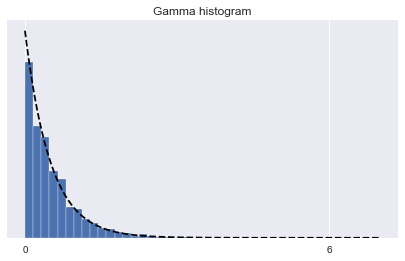

In [93]:
plt.style.use('seaborn')
fig, axes = plt.subplots(1, 1, figsize=(7, 4))
ax1=axes
ax1.hist(y,bins=20, density=True, edgecolor='white')
x=np.linspace(0,7,500)
alpha = 1
beta = 2
ax1.plot(x,stats.gamma.pdf(x,a=alpha,scale=1/beta),color='black',linestyle='--')
ax1.set_xticks([0,6])
ax1.set_yticks([])
ax1.set_title(r'Gamma histogram')
plt.show()

In [67]:
inv_model=stan_utility.compile_model('inv_gamma.stan')

Using cached StanModel


In [100]:
R=1000
sim_data=dict(alpha=6, beta=3)
sim_ppc=inv_model.sampling(data=sim_data,algorithm="Fixed_param", iter=R, warmup=0, chains=1, refresh=R, seed=29042020)
y = sim_ppc.extract()['y']

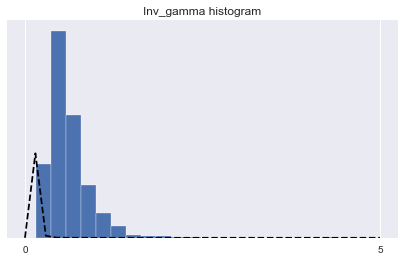

In [101]:
fig, axes = plt.subplots(1, 1, figsize=(7, 4))
ax1=axes
ax1.hist(y,bins=20, density=True, edgecolor='white')
x=np.linspace(0,5,35)
alpha = 6
beta = 3
ax1.plot(x,stats.invgamma.pdf(x,a=alpha,scale=1/beta),color='black',linestyle='--')
ax1.set_xticks([0,5])
ax1.set_yticks([])
ax1.set_title(r'Inv_gamma histogram')
plt.show()

2.

In [70]:
model_ppc=stan_utility.compile_model('neg_bin_con.stan')

Using cached StanModel


In [106]:
alpha = 2
mu = 7
R=1000
data_sim=dict(alpha=alpha,mu=mu)
sim=model_ppc.sampling(data=data_sim,algorithm="Fixed_param", iter=R, warmup=0, chains=1, refresh=R, seed=29042520)
params_sim=sim.extract()
nbin_con=params_sim['nbin_con']
poisson_con=params_sim['poisson_con']
nbin_pdf_eq = stats.nbinom(alpha, (alpha/mu)/(alpha/mu+1))
x=np.linspace(0, 100, 101)
nbin_pmf_con = []
for i in range(0, len(x)):
    nbin_pmf_con.append( nbin_pdf_eq.pmf( x[i] ))

C:\Users\mat\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\mat\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


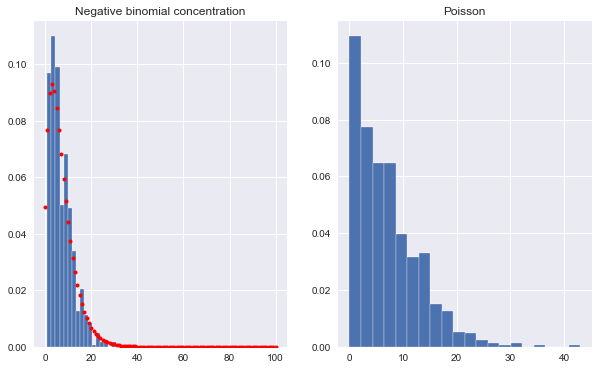

In [107]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

ax1=axes[0]
ax1.hist(nbin_con,bins=20, edgecolor='white', density=True)
ax1.plot(x, nbin_pmf_con,  'ro', markersize=4)
#ax1.set_yticks([])
ax1.set_title(r'Negative binomial concentration')

ax2=axes[1]
ax2.hist(poisson_con,edgecolor='white',density=True,bins=20)
ax2.set_title('Poisson')

plt.show()

In [73]:
model_ppc_2=stan_utility.compile_model('neg_bin_disp.stan')

Using cached StanModel


In [74]:
mu = 10
phi = 5
R=1000
data_sim=dict(mu=mu, phi=phi)
sim=model_ppc_2.sampling(data=data_sim,algorithm="Fixed_param", iter=R, warmup=0, chains=1, refresh=R, seed=29042020)
params_sim=sim.extract()
nbin_disp=params_sim['nbin_disp']
poisson_disp=params_sim['poisson_disp']
nbin_pdf_eq = stats.nbinom(phi, phi/(mu+phi))
x=np.linspace(0, 100, 101)
nbin_pmf_disp = []
for i in range(0, len(x)):
    nbin_pmf_disp.append( nbin_pdf_eq.pmf( x[i] ))

C:\Users\mat\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\mat\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


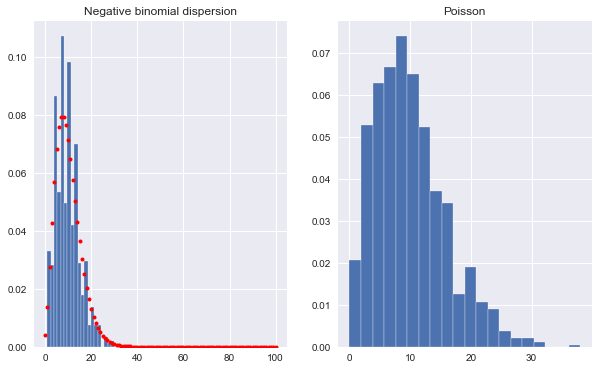

In [75]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

ax1=axes[0]
ax1.hist(nbin_disp,edgecolor='white',density=True,bins=20)
ax1.plot(x, nbin_pmf_disp,  'ro', markersize=4)
ax1.set_title('Negative binomial dispersion')

ax2=axes[1]
ax2.hist(poisson_disp,edgecolor='white',density=True,bins=20)
ax2.set_title('Poisson')

plt.show()

3.

In [76]:
model_ppc_3=stan_utility.compile_model('student_t_df.stan')

Using cached StanModel


In [77]:
df = 2
mu = 1
sigma = 10
R_dict=[10, 20, 50, 100,200,500,1000]
data_sim=dict(df=df, mu=mu,sigma=sigma)
sim_dict = []
y_dict = []
for i in range(0,len(R_dict)):
    sim_dict.append(model_ppc_3.sampling(data=data_sim,
                      algorithm="Fixed_param", 
                      iter=R_dict[i], 
                      warmup=0, 
                      chains=1,
                      seed=29042120))
    y_dict.append(sim_dict[i].extract()['y'])

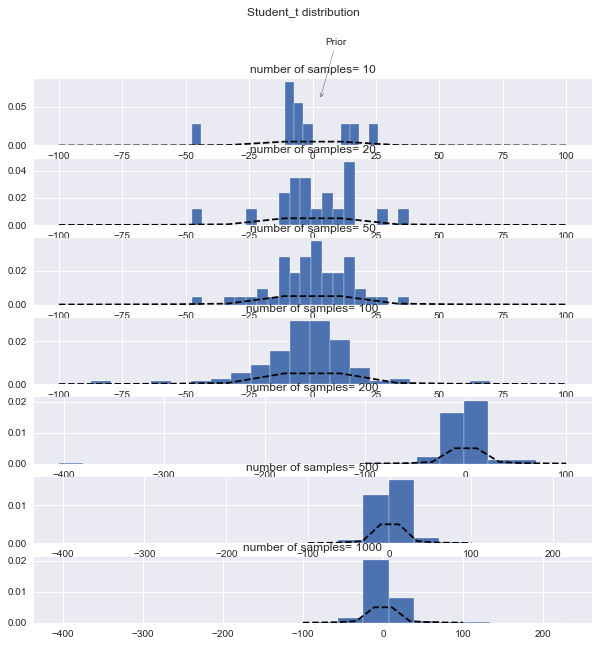

In [78]:
x=np.linspace(-100,100,10)

fig, axes = plt.subplots(len(R_dict), 1, figsize=(10, 10))

fig.suptitle('Student_t distribution')
for i in range(0,len(R_dict)):
    ax=axes[i]
    ax.hist(y_dict[i],bins=20,edgecolor='white',density=True)
    ax.plot(x,stats.t.pdf(x,df=1,loc=0,scale=2),color='black',linestyle='--')
    ax.annotate('Prior',xy=(3,0.06),xytext=(5,0.13),arrowprops={'arrowstyle':'->'})
    ax.set_title(r'number of samples= {}'.format(R_dict[i]))


plt.show()

In [79]:
for i in range(0,len(R_dict)):
    print("for {} samples:".format(R_dict[i]))
    print("Mean = {}, variance = {}".format(np.mean(y_dict[i]), np.var(y_dict[i])))

for 10 samples:
Mean = -3.3788523153861, variance = 353.43679426924837
for 20 samples:
Mean = 0.989893574919898, variance = 317.8429476712423
for 50 samples:
Mean = -0.056816505777437555, variance = 233.63656097589302
for 100 samples:
Mean = -2.4493160102985603, variance = 345.7404262991215
for 200 samples:
Mean = -1.8579664652579277, variance = 1159.135189566791
for 500 samples:
Mean = 0.7498106450752269, variance = 741.3351930239855
for 1000 samples:
Mean = 0.5814977785780095, variance = 799.9586883456707


4.

In [80]:
model_ppc_4=stan_utility.compile_model('multi_normal_2d.stan')

Using cached StanModel


In [81]:
mu = [1, 2]
sigma = [[5, 2], [2, 3]]
corr= cov2corr(sigma)
R=1000
data_sim=dict(mu=mu,sigma=corr)
sim=model_ppc_4.sampling(data=data_sim,
                      algorithm="Fixed_param", 
                      iter=R, 
                      warmup=0, 
                      chains=1,
                      seed=29042020)
params=sim.extract()
y=params['y']
y1= [y[i][0] for i in range(0,R)]
y2= [y[i][1] for i in range(0,R)]

[]

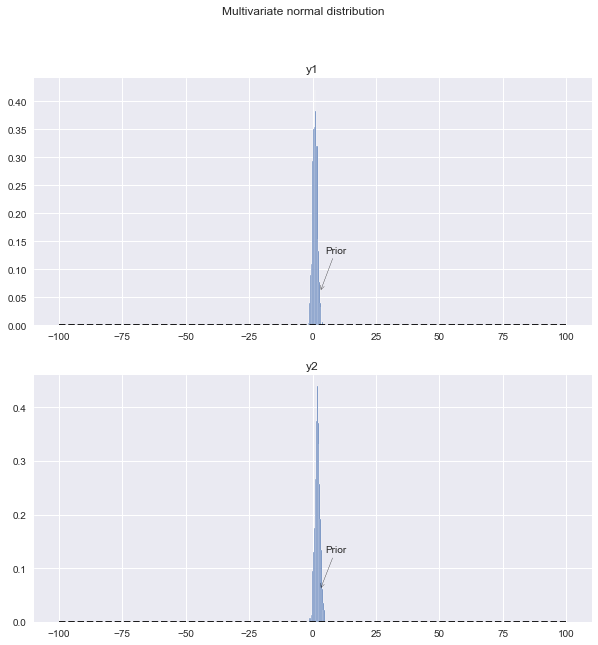

In [82]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
fig.suptitle('Multivariate normal distribution')
ax0=axes[0]
ax0.hist(y1,bins=20,edgecolor='white',density=True)
ax0.plot(x,norm.pdf(x),color='black',linestyle='--')
ax0.annotate('Prior',xy=(3,0.06),xytext=(5,0.13),arrowprops={'arrowstyle':'->'})
ax0.set_title(r'y1')

ax1=axes[1]
ax1.hist(y2,bins=20,edgecolor='white',density=True)
ax1.plot(x,norm.pdf(x),color='black',linestyle='--')
ax1.annotate('Prior',xy=(3,0.06),xytext=(5,0.13),arrowprops={'arrowstyle':'->'})
ax1.set_title(r'y2')

plt.plot()

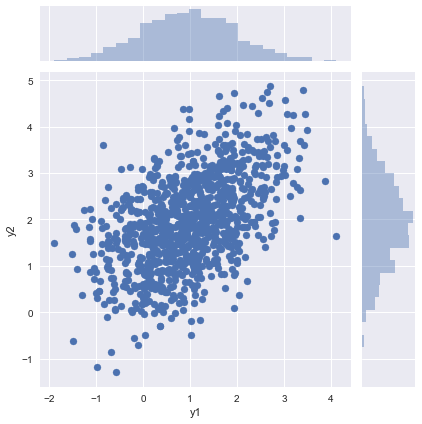

In [83]:
df = pd.DataFrame(y, columns=["y1", "y2"])
sns.jointplot(x="y1", y="y2", data=df)

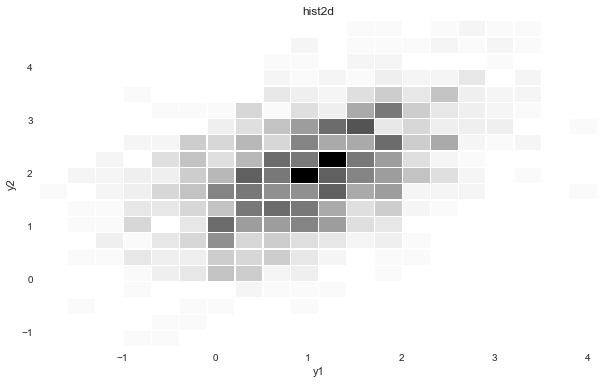

In [84]:
x=np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)

fig, axes = plt.subplots(1, 1, figsize=(10, 6))

axes.hist2d(y1,y2,bins=20,edgecolor='white', density=True)
axes.set_title(r'hist2d')
plt.xlabel('y1')
plt.ylabel('y2')

plt.show()

In [85]:
model_ppc_3d=stan_utility.compile_model('multi_normal_3d.stan')

Using cached StanModel


In [86]:
mu = [1, 3, 7]
sigma = [[1, 0.2, 0.4], [0.2, 1, 0.5],[0.4, 0.5, 7]]
corr= cov2corr(sigma)
R=1000
data_sim=dict(mu=mu,sigma=corr)
sim=model_ppc_3d.sampling(data=data_sim,
                      algorithm="Fixed_param", 
                      iter=R, 
                      warmup=0, 
                      chains=1,
                      seed=29042020)
params=sim.extract()
y=params['y']
y1= [y[i][0] for i in range(0,R)]
y2= [y[i][1] for i in range(0,R)]
y3= [y[i][2] for i in range(0,R)]

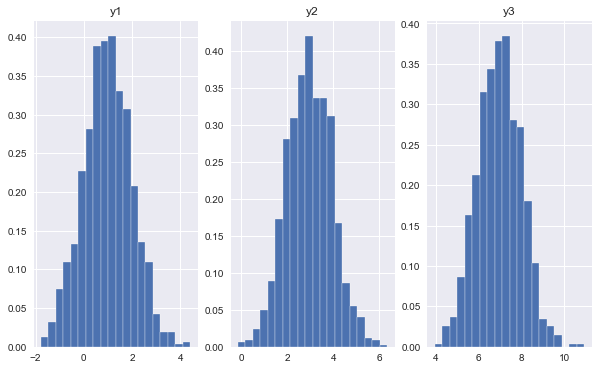

In [87]:
fig, axes = plt.subplots(1, 3, figsize=(10, 6))

ax1=axes[0]
ax1.hist(y1,bins=20,edgecolor='white',density=True)
ax1.set_title(r'y1')

ax2=axes[1]
ax2.hist(y2,bins=20,edgecolor='white',density=True)
ax2.set_title(r'y2')

ax2=axes[2]
ax2.hist(y3,bins=20,edgecolor='white',density=True)
ax2.set_title(r'y3')

plt.show()

In [88]:
model_ppc_4d=stan_utility.compile_model('multi_normal_4d.stan')

Using cached StanModel


In [89]:
mu = [1, 3, 7, 4]
sigma = [[1, 0.1, 0.4, 0.2], [0.1, 1, 0.8, 0.5],[0.4, 0.8, 5, 0.1], [0.2, 0.5, 0.1, 2]]
corr= cov2corr(sigma)
R=1000
data_sim=dict(mu=mu,sigma=corr)
sim=model_ppc_4d.sampling(data=data_sim,
                      algorithm="Fixed_param", 
                      iter=R, 
                      warmup=0, 
                      chains=1,
                      seed=29042020)
params=sim.extract()
y=params['y']
y1= [y[i][0] for i in range(0,R)]
y2= [y[i][1] for i in range(0,R)]
y3= [y[i][2] for i in range(0,R)]
y4= [y[i][3] for i in range(0,R)]

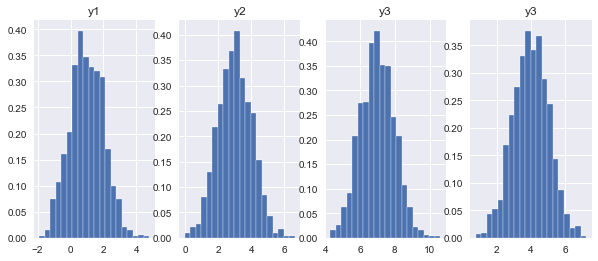

In [90]:
fig, axes = plt.subplots(1, 4, figsize=(10, 4))

ax1=axes[0]
ax1.hist(y1,bins=20,edgecolor='white',density=True)
ax1.set_title(r'y1')

ax2=axes[1]
ax2.hist(y2,bins=20,edgecolor='white',density=True)
ax2.set_title(r'y2')

ax3=axes[2]
ax3.hist(y3,bins=20,edgecolor='white',density=True)
ax3.set_title(r'y3')

ax4=axes[3]
ax4.hist(y4,bins=20,edgecolor='white',density=True)
ax4.set_title(r'y3')

plt.show()